<h1 style="background-color:MediumTurquoise;border-radius:5px;text-align:center;padding:15px;color:white;">AI Technologies Assignment - Part 2</h1>
<h4>Done by: V Varsha (203011T)<br><br>Module Code: IT3312</h4>

## 1. Import Modules

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

## 2. Read Data

In [18]:
#read the different batches of data
train_batch1 = pd.read_pickle("train_batch1.pkl")  
train_batch2 = pd.read_pickle("train_batch2.pkl")  
train_batch3 = pd.read_pickle("train_batch3.pkl")  
train_batch4 = pd.read_pickle("train_batch4.pkl")  
train_batch5 = pd.read_pickle("train_batch5.pkl")  
test_data = pd.read_pickle("test_batch1.pkl")  
#merge the training data into a single dataframe
train_data=pd.concat([train_batch1, train_batch2,train_batch3,train_batch4,train_batch5])
#merge the training data and test data into a single data frame for Exploratory Data Analysis
data=pd.concat([train_data,test_data])

In [19]:
# X_train and X_test dataset are the training and testing dataset without the 'label' column 
X_train = train_data.iloc[:,:-1]
X_test=test_data.iloc[:,:-1]
X = data.iloc[:,:-1]

# y_train and y_test datasets are the training dataset and testing dataset with the 'label' column only
y_train= train_data["label"]
y_test=test_data["label"]
y=data["label"]

## 3. Data Preparation

In [20]:
# convert from integers to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X = X.astype("float32")

In [21]:
# normalize to range between 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0
X = X /255.0

## 4. Define Functions

In [5]:
#This function is used to evaluvate the models' performance on the testing dataset
def eval_model(model,model_name):
    model_predictions=model.predict(X_test)
    print("\n \n ---------------------Classification Report---------------------")
    print(classification_report(y_test,model_predictions)) #print classification report
    print("---------------------------------------------------------------")
    plot_confusion_matrix(model_predictions,model_name) # call function to plot confusion matrix

In [6]:
# This function is for performing cross validation
kfolds = KFold(n_splits=10, random_state=42, shuffle=True) #number of folds for kfold validation
def cross_validation(model,model_name):
    cross_val_f1_score=cross_val_score(model, X, y, cv=kfolds, scoring='f1_macro') #cross validate f1-score
    cross_val_acc_score=cross_val_score(model, X, y, cv=kfolds, scoring='accuracy')  #cross validate accuracy
    print("{} Mean Cross Validation F1-Score:{}".format(model_name,round(cross_val_f1_score.mean(),3)))
    print("{} Mean Cross Validation Accuracy:{}{}".format(model_name,round(cross_val_acc_score.mean()*100,3),"%"))

Cross-Validation is one of the most efficient ways of interpreting the model performance. It ensures that the model accurately fits the data and also checks for any Overfitting. It is the process of assessing how the results of a model will generalize to an independent dataset.

In [7]:
# This function is used to plot the confusion matrix
def plot_confusion_matrix(model_predictions,model_name):
    model_confusion_matrix = confusion_matrix(y_test, model_predictions)
    sns.set(font_scale=5)
    plt.figure(figsize=(100,50))
    sns.heatmap(model_confusion_matrix, annot=True,cmap="Blues")
    plt.title('{} Confusion Matrix'.format(model_name),fontsize=100)
    plt.ylabel('Actual Values')
    plt.xlabel('Predicted Values')
    plt.show()

## 5. Random Forest Classifier
Random forests is a supervised learning algorithm. A forest is comprised of trees. The more trees it has, the more robust a forest is. Random forests creates decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting. It is the a flexible and easy to use algorithm.

### 5.1 Random Forest Classifier - Before Tuning

In [8]:
#call random forest classifier without parameters
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train) #fit model on training dataset

RandomForestClassifier()

In [9]:
print("The parameters of Random Forest Classifier before tuning:")
rfc.get_params()

The parameters of Random Forest Classifier before tuning:


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Before tuning all the parameters are set to the default values

#### 5.1.1 Random Forest Classifier - Before Tuning: Evaluvate Model

Evaluvate performance of Random Forest Classifier before tuning


 
 ---------------------Classification Report---------------------
              precision    recall  f1-score   support

           0       0.45      0.47      0.46       958
           1       0.51      0.47      0.49      1079
           2       0.34      0.34      0.34      1020
           3       0.23      0.32      0.27       709
           4       0.36      0.32      0.34      1112
           5       0.35      0.40      0.37       871
           6       0.42      0.39      0.41      1067
           7       0.41      0.44      0.43       935
           8       0.55      0.49      0.52      1111
           9       0.49      0.43      0.46      1138

    accuracy                           0.41     10000
   macro avg       0.41      0.41      0.41     10000
weighted avg       0.42      0.41      0.41     10000

---------------------------------------------------------------


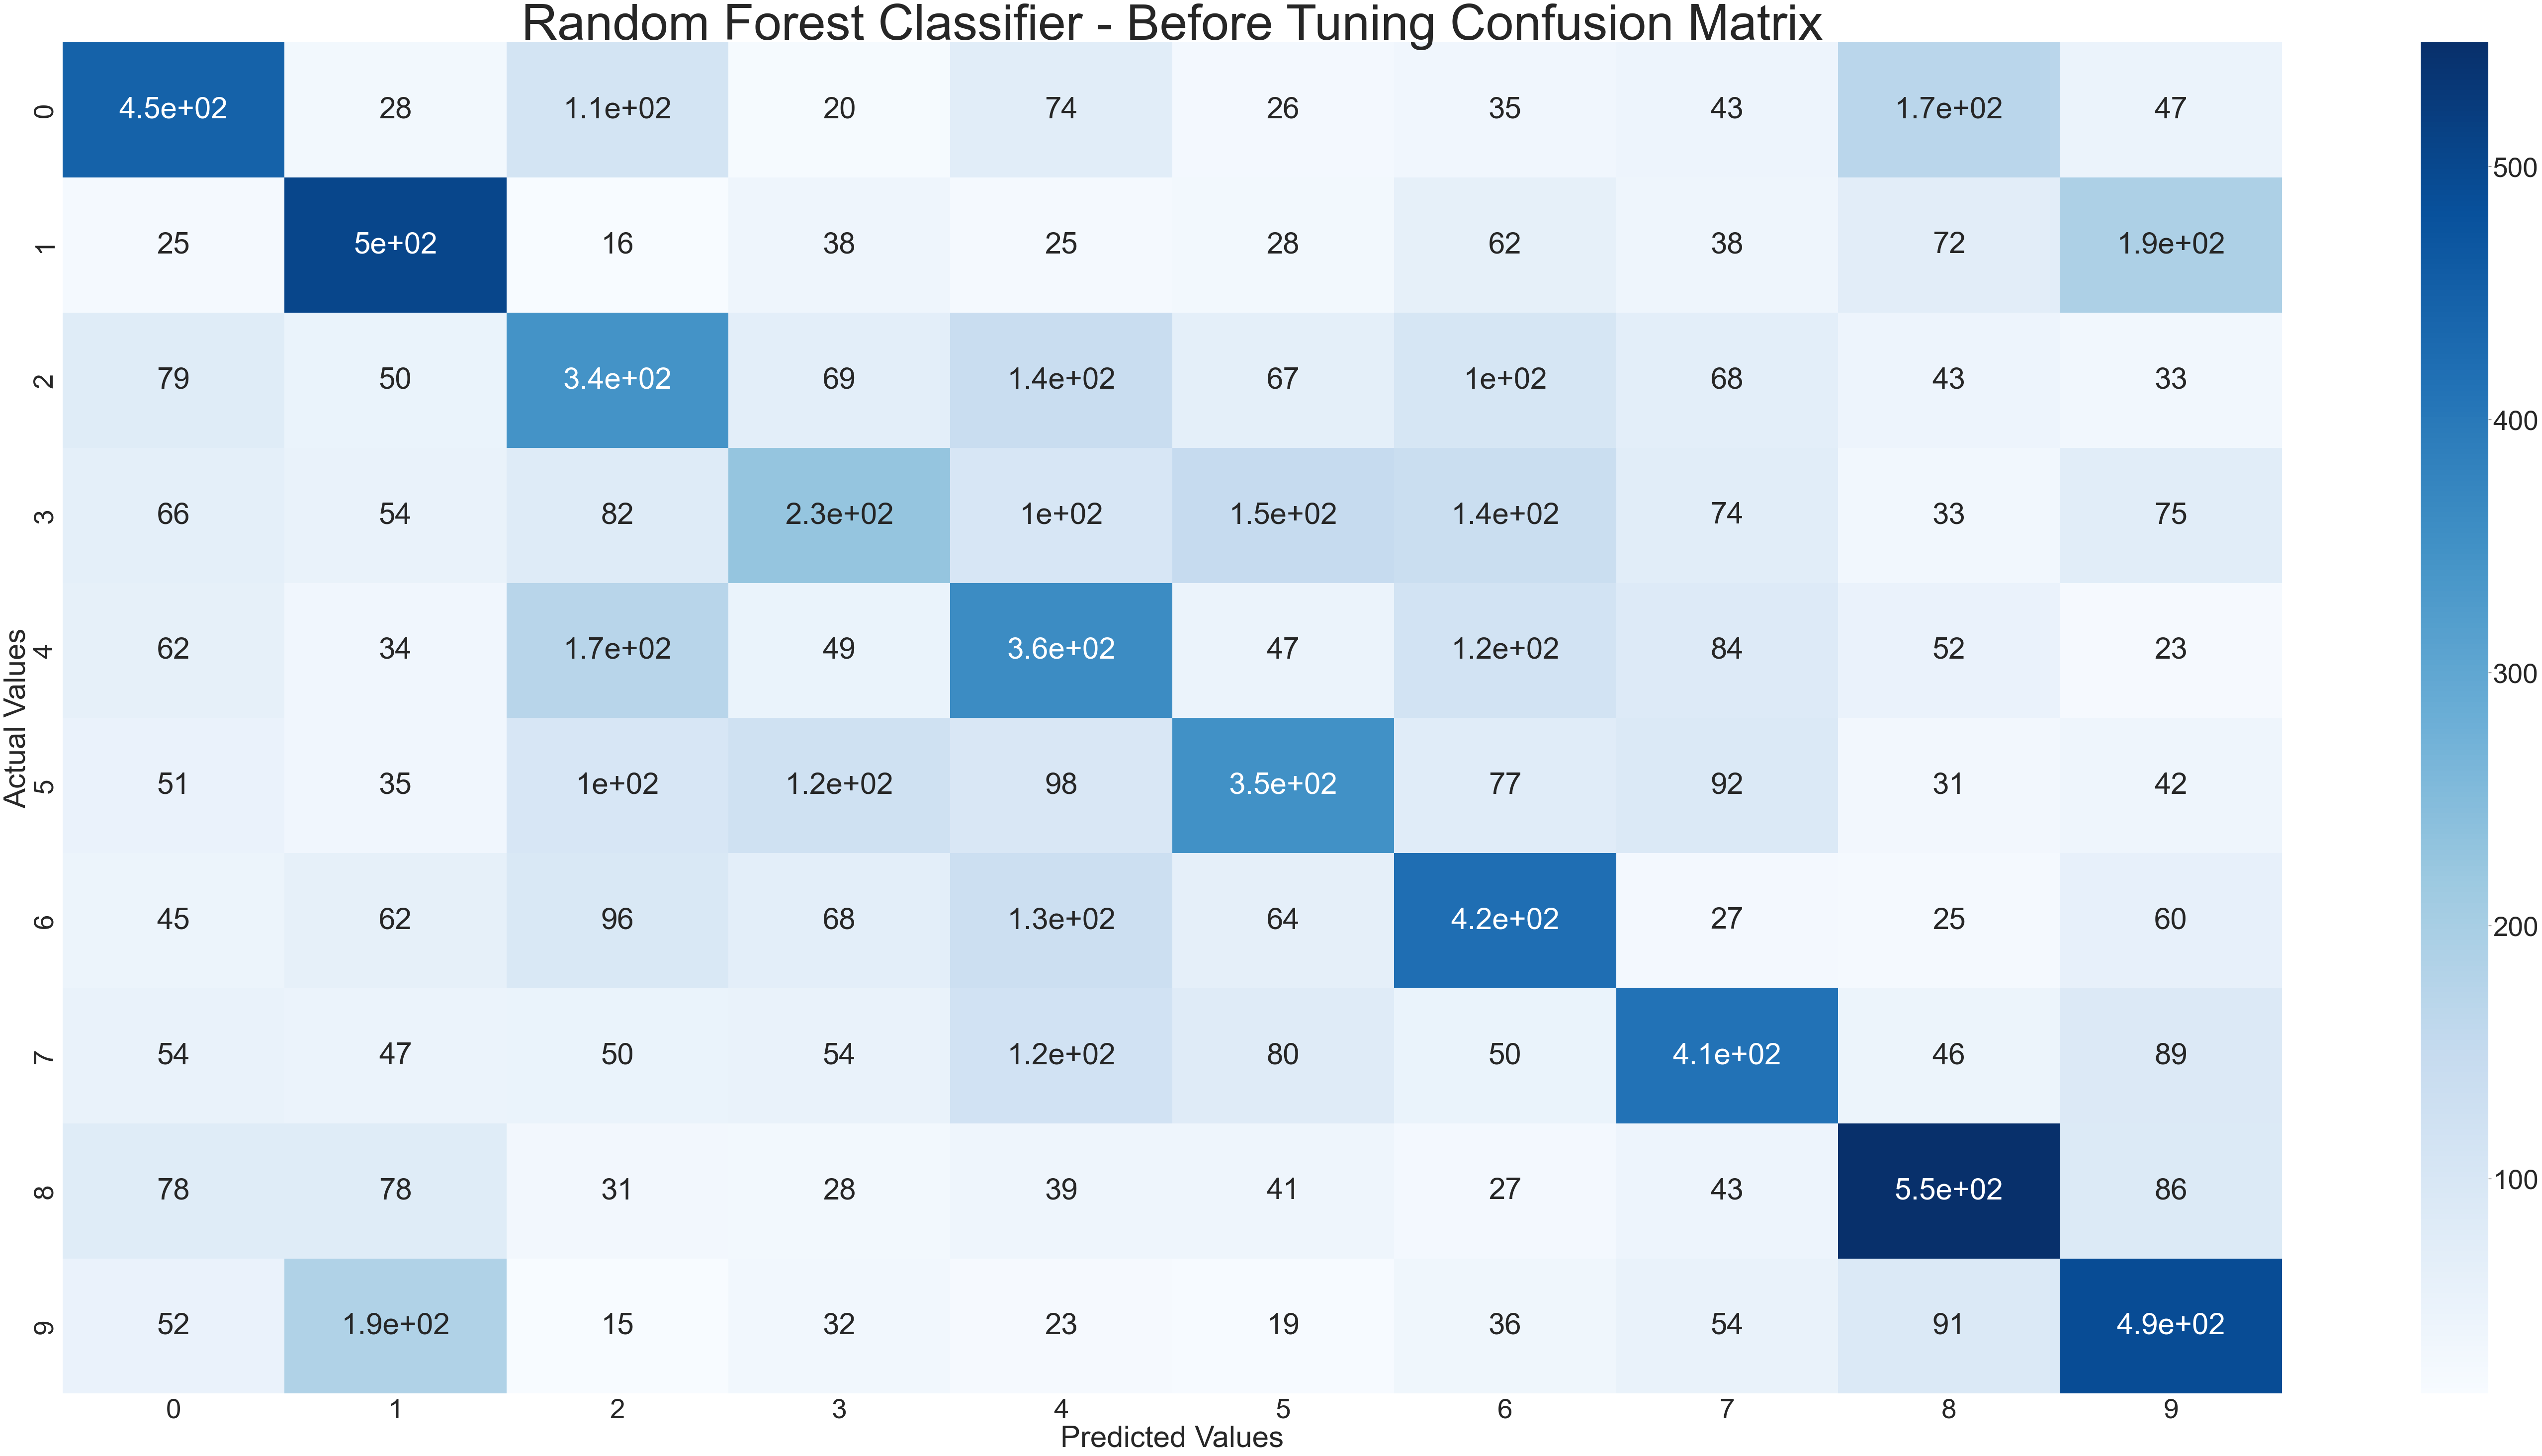

In [13]:
eval_model(rfc,"Random Forest Classifier - Before Tuning")

In [15]:
cross_validation(rfc,"Random Forest Classifier - Before Tuning")

Random Forest Classifier - Before Tuning Mean Cross Validation F1-Score:0.412
Random Forest Classifier - Before Tuning Mean Cross Validation Accuracy:41.585%


The model is poor performing. In classification problems, the most important metrics are the precision,recall and f1-score. 
<ul>
    <li>Precision - A measure of how many of the positive predictions made are correctly </li>
    <li> Recall - A measure of how many of the positive cases the classifier correctly predicted, over all the positive cases in the data. </li>
    <li> F1-score - A measure combining both precision and recall. It is generally described as the harmonic mean of the two. </li>
    </ul>
    
The cross validated f1-score of the model is 0.412. This is extremely low. Based on the classification report, the classes with:
<ul>
    <li> Poor Precision - 3,4,5 as the precisions are below 0.4 </li>
    <li> Poor Recall - 3,4,6 as the recalls are below 0.4  </li>
    <li> Poor F1-score - 2,3,4,5 as the f1-scores are below 0.4 </li>
    </ul>
    
 However, the model is still performing poorly across all classes as the none of the metrics are above 0.8 
 
 Based on the confusion matrix:
<ul>
    <li> Class 0 is generally misclassified to Class 2,4,8 </li>
<li>Class 1 is generally misclassified to Class 9 </li>
<li>Class 2 is generally misclassified to Class 4,6 </li>
<li>Class 3 is generally misclassified to Class 5,6 </li>
<li>Class 4 is generally misclassified to Class 2,6 </li>
<li>Class 5 is generally misclassified to Class 2,6</li>
<li>Class 6 is generally misclassified to Class 2,3</li>
<li>Class 7 is generally misclassified to Class 4,9</li>
<li>Class 8 is generally misclassified to Class 0,1,9 however the misclassification is compratively lower </li>
<li>Class 9 is generally misclassified to Class 1 </li>
    </ul>

This explains the results of the confusion matrix and classification report

### 5.2 Random Forest Classifier - Random Search with Cross Validation
In order to fine tune the random forest classifier, I will perform random search followed by grid search to identify the ideal paramters to optimize the models' performance. The random search will try random combinations of the paramters and it will help in narrowing down the paramters. Hence, the range of the paramters are larger. The cross validaion will ensure that the model is not overfitting when identifying the ideal set of paramters. Hence, it will ensure that the model is able to generalize well on unseen data.

In [3]:
# Number of trees in random forest
rfc_random_search_n_estimators = np.arange(start = 100, stop = 2050, step = 50)

# Number of features to consider at every split
rfc_random_search_max_features = ['auto', 'sqrt',"log2",None]

# Method of selecting samples for training each tree
rfc_random_search_bootstrap = [True, False]

# maximum depth of the tree
rfc_random_search_max_depth = [1, 5, 10, 20, 50, 75, 100, 150, 200, None]

# minimum number of samples required to split an internal node
rfc_random_search_min_samples_split = [1, 2, 5, 10, 15, 20, 30]

# minimum number of samples required to be at a leaf node. 
rfc_random_search_min_samples_leaf = [1, 2, 3, 4]

# function to measure the quality of a split
rfc_random_search_criterion = ["gini", "entropy","log_loss"]

In [4]:
#Set random search parameter grid
random_search_param_grid = {
    'max_features': rfc_random_search_max_features,
    'bootstrap': rfc_random_search_bootstrap,
    "criterion":rfc_random_search_criterion,
    'n_estimators': rfc_random_search_n_estimators,
    "max_depth":rfc_random_search_max_depth,
    "min_samples_split":rfc_random_search_min_samples_split,
    "min_samples_leaf":rfc_random_search_min_samples_leaf
        }

In [10]:
print("Random Forest Classification - Random Search Parameter grid:")
random_search_param_grid

Random Forest Classification - Random Search Parameter grid:


{'max_features': ['auto', 'sqrt', 'log2', None],
 'bootstrap': [True, False],
 'criterion': ['gini', 'entropy', 'log_loss'],
 'n_estimators': array([ 100,  150,  200,  250,  300,  350,  400,  450,  500,  550,  600,
         650,  700,  750,  800,  850,  900,  950, 1000, 1050, 1100, 1150,
        1200, 1250, 1300, 1350, 1400, 1450, 1500, 1550, 1600, 1650, 1700,
        1750, 1800, 1850, 1900, 1950, 2000]),
 'max_depth': [1, 5, 10, 20, 50, 75, 100, 150, 200, None],
 'min_samples_split': [1, 2, 5, 10, 15, 20, 30],
 'min_samples_leaf': [1, 2, 3, 4]}

In [28]:
#call grid search cv and fit model on random search cv 
rfc_random_search_Cv = RandomizedSearchCV(estimator = rfc, param_distributions = random_search_param_grid, cv = 3, verbose=2, random_state=42, n_jobs = -1,n_iter=30,scoring="f1_macro")
#scoring used as f1_score as it is the most important metric in this classification problem
rfc_random_search_Cv.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=30,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [1, 5, 10, 20, 50, 75, 100,
                                                      150, 200, None],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [1, 2, 5, 10, 15,
                                                              20, 30],
                                        'n_estimators': array([ 100,  150,  200,  250,  300,  350,  400,  450,  500,  550,  600,
        650,  700,  750,  800,  850,  900,  950, 1000, 1050, 1100, 1150,
       1200, 1250, 1300, 1350, 1400, 1450, 1500, 1550, 1600, 1650, 1700,
       1750, 1800, 1850, 1900, 1950, 2000])},
                   random_state=42, verbose=2)

In [41]:
#get best parameters
print("Random Forest Classifier Best Parameters from Randomized Grid Search with Cross Validation are: \n")
print(rfc_random_search_Cv.best_params_)

Random Forest Classifier Best Parameters from Randomized Grid Search with Cross Validation are: 

{'n_estimators': 1100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 200, 'criterion': 'gini', 'bootstrap': False}


#### 5.2.1 Random Forest Classifier - Random Search: Evaluvate Model

In [18]:
#run model on best parameters
rfc_random_search = rfc=RandomForestClassifier(n_estimators = 1100, min_samples_split = 5, min_samples_leaf = 1, max_features = "log2", max_depth = 200, criterion = "gini", bootstrap = False,random_state=42, n_jobs = -1)
rfc_random_search.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, max_depth=200, max_features='log2',
                       min_samples_split=5, n_estimators=1100, n_jobs=-1,
                       random_state=42)


 
 ---------------------Classification Report---------------------
              precision    recall  f1-score   support

           0       0.45      0.52      0.48       856
           1       0.50      0.50      0.50      1013
           2       0.36      0.40      0.38       918
           3       0.24      0.35      0.28       676
           4       0.38      0.37      0.38      1025
           5       0.40      0.44      0.42       892
           6       0.52      0.44      0.48      1183
           7       0.48      0.48      0.48      1000
           8       0.59      0.51      0.55      1153
           9       0.56      0.44      0.49      1284

    accuracy                           0.45     10000
   macro avg       0.45      0.44      0.44     10000
weighted avg       0.46      0.45      0.45     10000

---------------------------------------------------------------


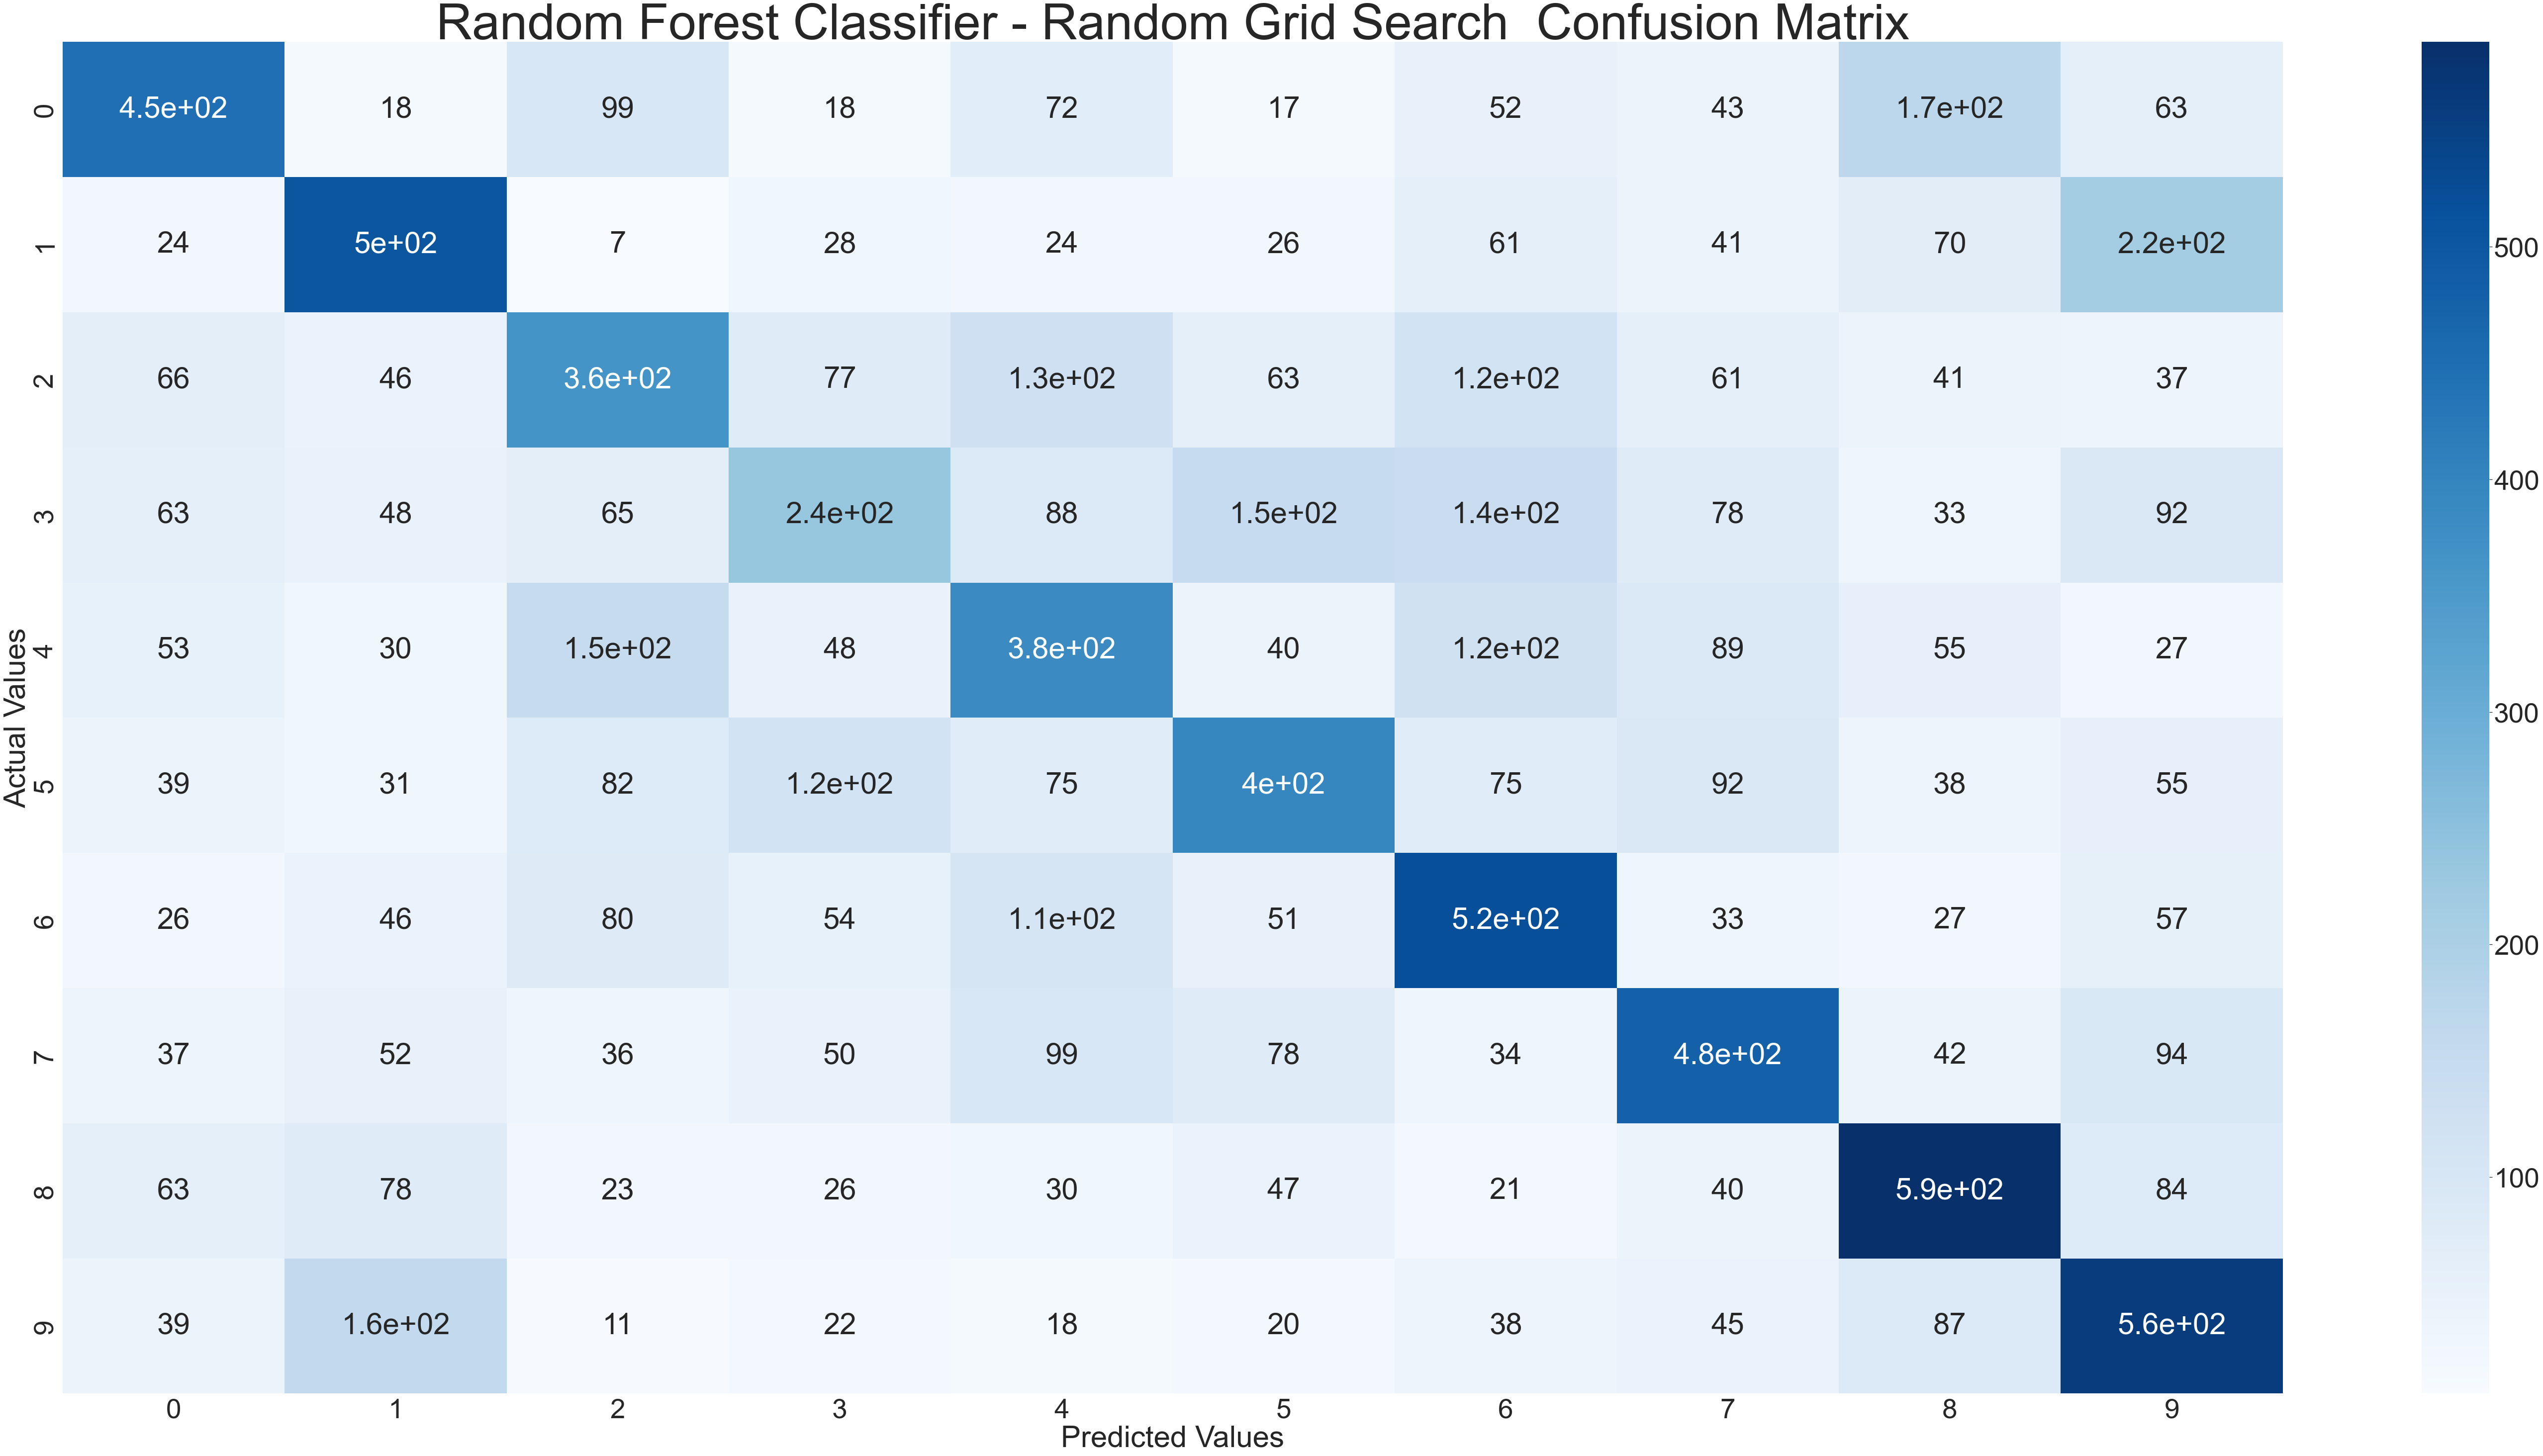

In [19]:
#evaluvate model
eval_model(rfc_random_search,"Random Forest Classifier - Random Grid Search ")

In [20]:
cross_validation(rfc_random_search,"Random Forest Classifier - Grid Search")

Random Forest Classifier - Grid Search Mean Cross Validation F1-Score:0.442
Random Forest Classifier - Grid Search Mean Cross Validation Accuracy:44.69%


The random search was very effective as the cross validated f1-score increased by 0.03 from 0.412 to 0.442. The accuracy improved by 3.11% from 41.585% to 44.69%. 

However the model is still poor performing.Based on the classification report, the classes with improvement are:
<ul>
    <li> Precision - 2,3,4,5,6,7,8,9 </li>
    <li> Recall - 0 ,1,2,3,4,5,6,7,8,9 </li>
    <li> F1-score - 0,2,3,4,5,6,7,8,9</li>
    </ul>
  
 Many classes has seen improvement. However, the model is still performing poorly across all classes as the none of the metrics are above 0.8 
 
 Based on the confusion matrix:
<ul>
    <li> Class 0 is generally misclassified to Class 8 </li>
<li>Class 1 is generally misclassified to Class 9 </li>
<li>Class 2 is generally misclassified to Class 4,6 </li>
<li>Class 3 is generally misclassified to Class 5,6 </li>
<li>Class 4 is generally misclassified to Class 2,6 </li>
<li>Class 5 is generally misclassified to Class 3 </li>
<li>Class 6 is generally misclassified to Class 4,9 however the misclassification is compratively lower</li>
<li>Class 7 is generally misclassified to Class 4,5 however the misclassification is compratively lower</li>
<li>Class 8 is generally misclassified to Class 0,1,9 however the misclassification is compratively lower </li>
<li>Class 9 is generally misclassified to Class 1 </li>
 </ul>

This explains the results of the confusion matrix and classification report

### 5.3 Random Forest Classifier - Grid Search with Cross Validation
The random search had helped to narrow down the range of the hyper paramters. Hence, to identify the most ideal set of parameters, I will be performing grid search on a smaller range of parameters. As mentioned previously, the cross validaion will ensure that the model is not overfitting when identifying the ideal set of paramters. Hence, it will ensure that the model is able to generalize well on unseen data.

In [13]:
# Number of trees in random forest
rfc_gridsearch_n_estimators = np.arange(start = 1000, stop = 1500, step = 100)

# Number of features to consider at every split
rfc_gridsearch_max_features = ['sqrt',"log2"]

# Method of selecting samples for training each tree
rfc_gridsearch_bootstrap = [False]

# maximum depth of the tree
rfc_gridsearch_max_depth = [150,200,250]

# minimum number of samples required to split an internal node
rfc_gridsearch_min_samples_split = [5]

# minimum number of samples required to be at a leaf node.
rfc_gridsearch_min_samples_leaf = [1]

# function to measure the quality of a split
rfc_gridsearch_criterion = ["gini", "entropy","log_loss"]

In [14]:
#set grid search parameter grid
rfc_gridsearch_param_grid = {
    'max_features': rfc_gridsearch_max_features,
    "criterion":rfc_gridsearch_criterion,
    "bootstrap":rfc_gridsearch_bootstrap,
    'n_estimators': rfc_gridsearch_n_estimators,
    "max_depth":rfc_gridsearch_max_depth,
    "min_samples_split":rfc_gridsearch_min_samples_split,
    "min_samples_leaf":rfc_gridsearch_min_samples_leaf
        }

In [15]:
print("Random Forest Classification - Grid Search Parameter grid:")
rfc_gridsearch_param_grid

Random Forest Classification - Grid Search Parameter grid:


{'max_features': ['sqrt', 'log2'],
 'criterion': ['gini', 'entropy', 'log_loss'],
 'bootstrap': [False],
 'n_estimators': array([1000, 1100, 1200, 1300, 1400]),
 'max_depth': [150, 200, 250],
 'min_samples_split': [5],
 'min_samples_leaf': [1]}

In [23]:
#call grid search cv and fit model on grid search cv 
rfc_gridsearch_cv = GridSearchCV(estimator = rfc, param_grid = rfc_gridsearch_param_grid, cv = 3, n_jobs = -1, verbose = 2,scoring="f1_macro")
#scoring used as f1_score as it is the most important metric in this classification problem
rfc_gridsearch_cv.fit(X_train, y_train)

Fitting 3 folds for each of 90 candidates, totalling 270 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [False],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [150, 200, 250],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1], 'min_samples_split': [5],
                         'n_estimators': array([1000, 1100, 1200, 1300, 1400])},
             scoring='f1_macro', verbose=2)

In [33]:
print("Random Forest Classifier Best Parameters from Grid Search with Cross Validation are: \n")
print(rfc_gridsearch_cv.best_params_)

Random Forest Classifier Best Parameters from Grid Search with Cross Validation are: 

{'bootstrap': False, 'criterion': 'gini', 'max_depth': 200, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 1100}


In [22]:
#run model on best parameters
rfc_gridsearch = RandomForestClassifier(n_estimators = 1300, min_samples_split = 5, min_samples_leaf = 1, max_features = "log2", max_depth = 250, criterion = "gini", bootstrap = False,random_state=42, n_jobs = -1)
rfc_gridsearch.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, max_depth=250, max_features='log2',
                       min_samples_split=5, n_estimators=1300, n_jobs=-1,
                       random_state=42)

#### 5.2.1 Random Forest Classifier - Grid Search: Evaluvate Model


 
 ---------------------Classification Report---------------------
              precision    recall  f1-score   support

           0       0.45      0.52      0.48       860
           1       0.51      0.50      0.50      1011
           2       0.36      0.39      0.38       922
           3       0.24      0.35      0.28       680
           4       0.38      0.38      0.38      1009
           5       0.40      0.45      0.42       889
           6       0.51      0.43      0.47      1184
           7       0.48      0.48      0.48       999
           8       0.59      0.51      0.54      1158
           9       0.56      0.44      0.49      1288

    accuracy                           0.45     10000
   macro avg       0.45      0.44      0.44     10000
weighted avg       0.46      0.45      0.45     10000

---------------------------------------------------------------


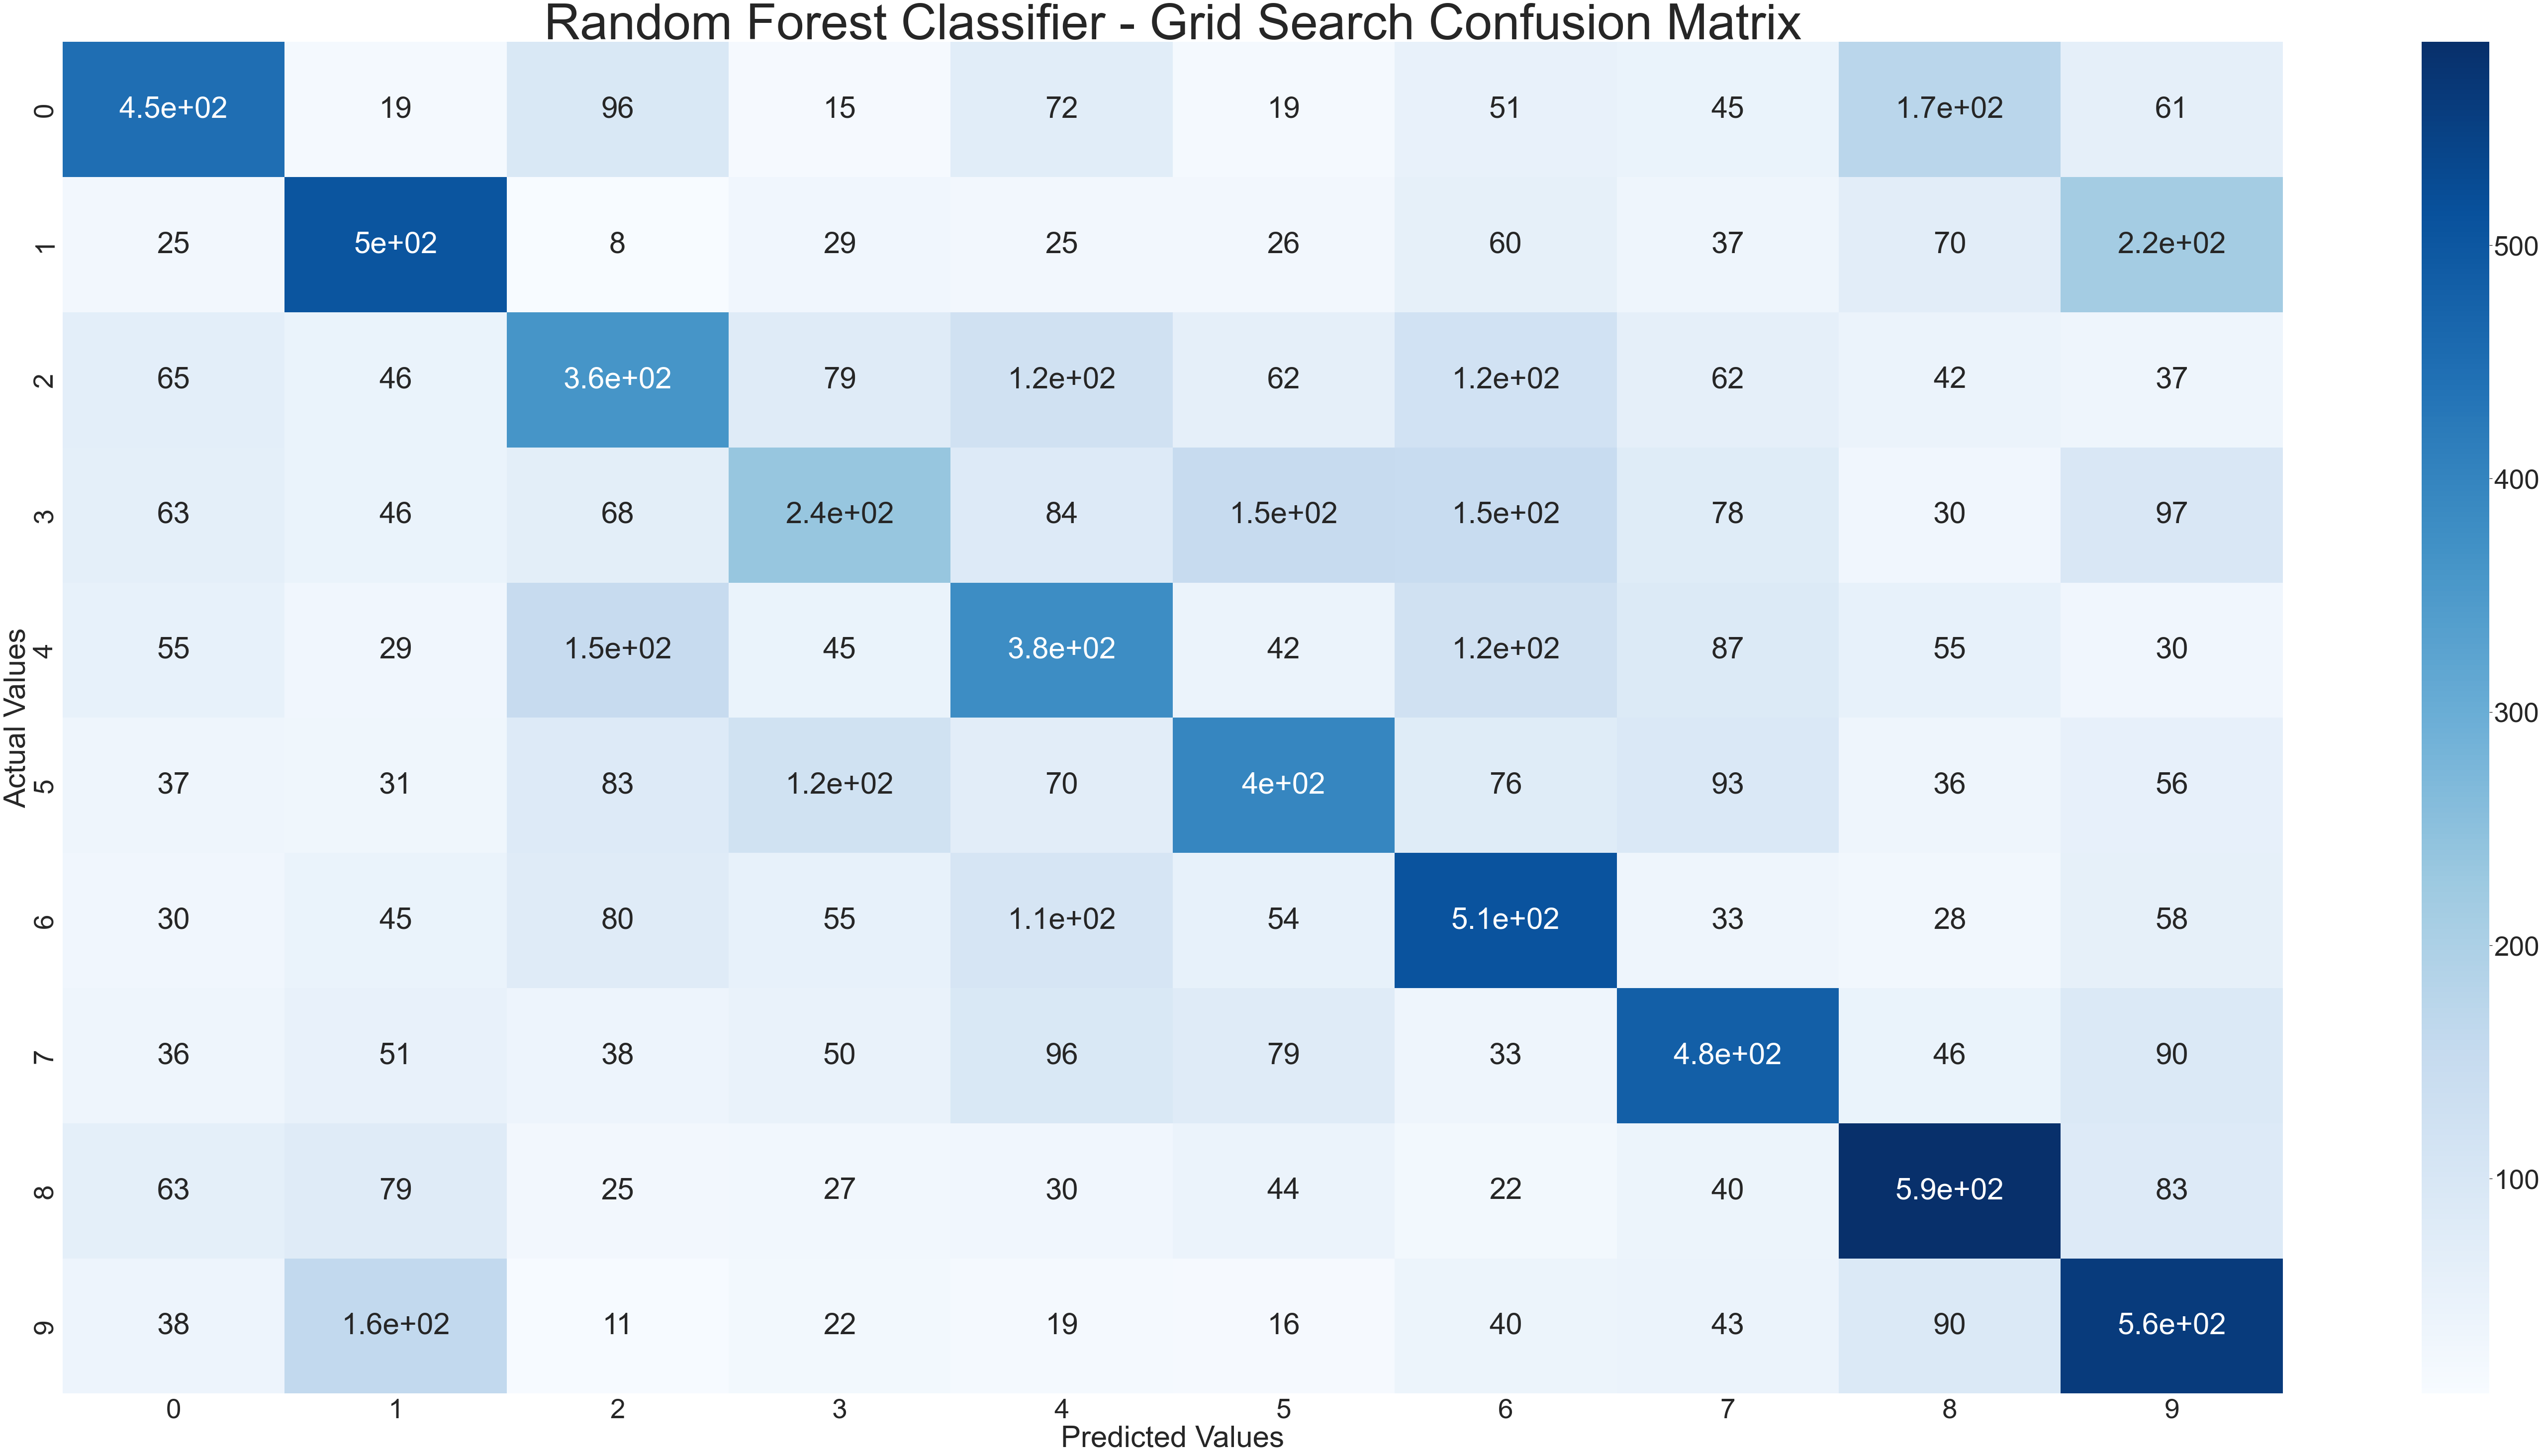

In [23]:
#evaluvate model
eval_model(rfc_gridsearch,"Random Forest Classifier - Grid Search")

In [24]:
cross_validation(rfc_gridsearch,"Random Forest Classifier - Grid Search")

Random Forest Classifier - Grid Search Mean Cross Validation F1-Score:0.443
Random Forest Classifier - Grid Search Mean Cross Validation Accuracy:44.767%


The grid search was somewhat effective as the cross validated f1-score increased by 0.001 from 0.442 to 0.443. The accuracy improved by 0.077% from 44.69% to 44.767%. 

However the model is still poor performing.Based on the classification report, the classes with improvement are:
<ul>
    <li> Precision - 1,6 </li>
    <li> Recall - 2,4,5,6 </li>
    <li> F1-score - 6,8 </li>
    </ul>
  
 Some classes has seen minor improvement. However, the model is still performing poorly across all classes as the none of the metrics are above 0.8 
 
 Based on the confusion matrix:
<ul>
    <li> Class 0 is generally misclassified to Class 8 </li>
<li>Class 1 is generally misclassified to Class 9 </li>
<li>Class 2 is generally misclassified to Class 4,6 </li>
<li>Class 3 is generally misclassified to Class 5,6 </li>
<li>Class 4 is generally misclassified to Class 2,6 </li>
<li>Class 5 is generally misclassified to Class 3 </li>
<li>Class 6 is generally misclassified to Class 4,9 however the misclassification is compratively lower</li>
<li>Class 7 is generally misclassified to Class 4,5 however the misclassification is compratively lower</li>
<li>Class 8 is generally misclassified to Class 0,1,9 however the misclassification is compratively lower </li>
<li>Class 9 is generally misclassified to Class 1 </li>
 </ul>

This explains the results of the confusion matrix and classification report.

In conclusion, the randomized search helped to reduce the computational time as I was able to effectively narrow down the range of the paramters. This enabled me to identify the best set of paramters efficiently. I ran the grid search on a smaller range of parameters. Although it was not able to dramatically enhance the performance of the model but the model has seen minor improvement. Therefore, this is the most ideal set of parameters for the Random Forest Classification which led to the best image classification result

## 6. Logistic Regression Classifier

### 6.1 Logistic Regression Classifier - Before Tuning

In [22]:
#call logistic regression classifier without parameters
lrc = LogisticRegression()
lrc.fit(X_train,y_train) #fit model on training dataset

LogisticRegression()

In [23]:
print("The parameters of Logistic Regression Classifier before tuning:")
lrc.get_params()

The parameters of Logistic Regression Classifier before tuning:


{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

Before tuning all the paramters are set to the default values

#### 6.1.1 Logistic Regression Classifier - Before Tuning: Evaluvate Model

Evaluvate performance of Logistic Regression Classifier before tuning


 
 ---------------------Classification Report---------------------
              precision    recall  f1-score   support

           0       0.34      0.31      0.32      1080
           1       0.38      0.37      0.37      1039
           2       0.22      0.25      0.23       877
           3       0.15      0.23      0.18       653
           4       0.20      0.25      0.22       822
           5       0.30      0.31      0.31       976
           6       0.28      0.27      0.28      1065
           7       0.31      0.29      0.30      1050
           8       0.40      0.33      0.36      1243
           9       0.45      0.38      0.41      1195

    accuracy                           0.30     10000
   macro avg       0.30      0.30      0.30     10000
weighted avg       0.32      0.30      0.31     10000

---------------------------------------------------------------


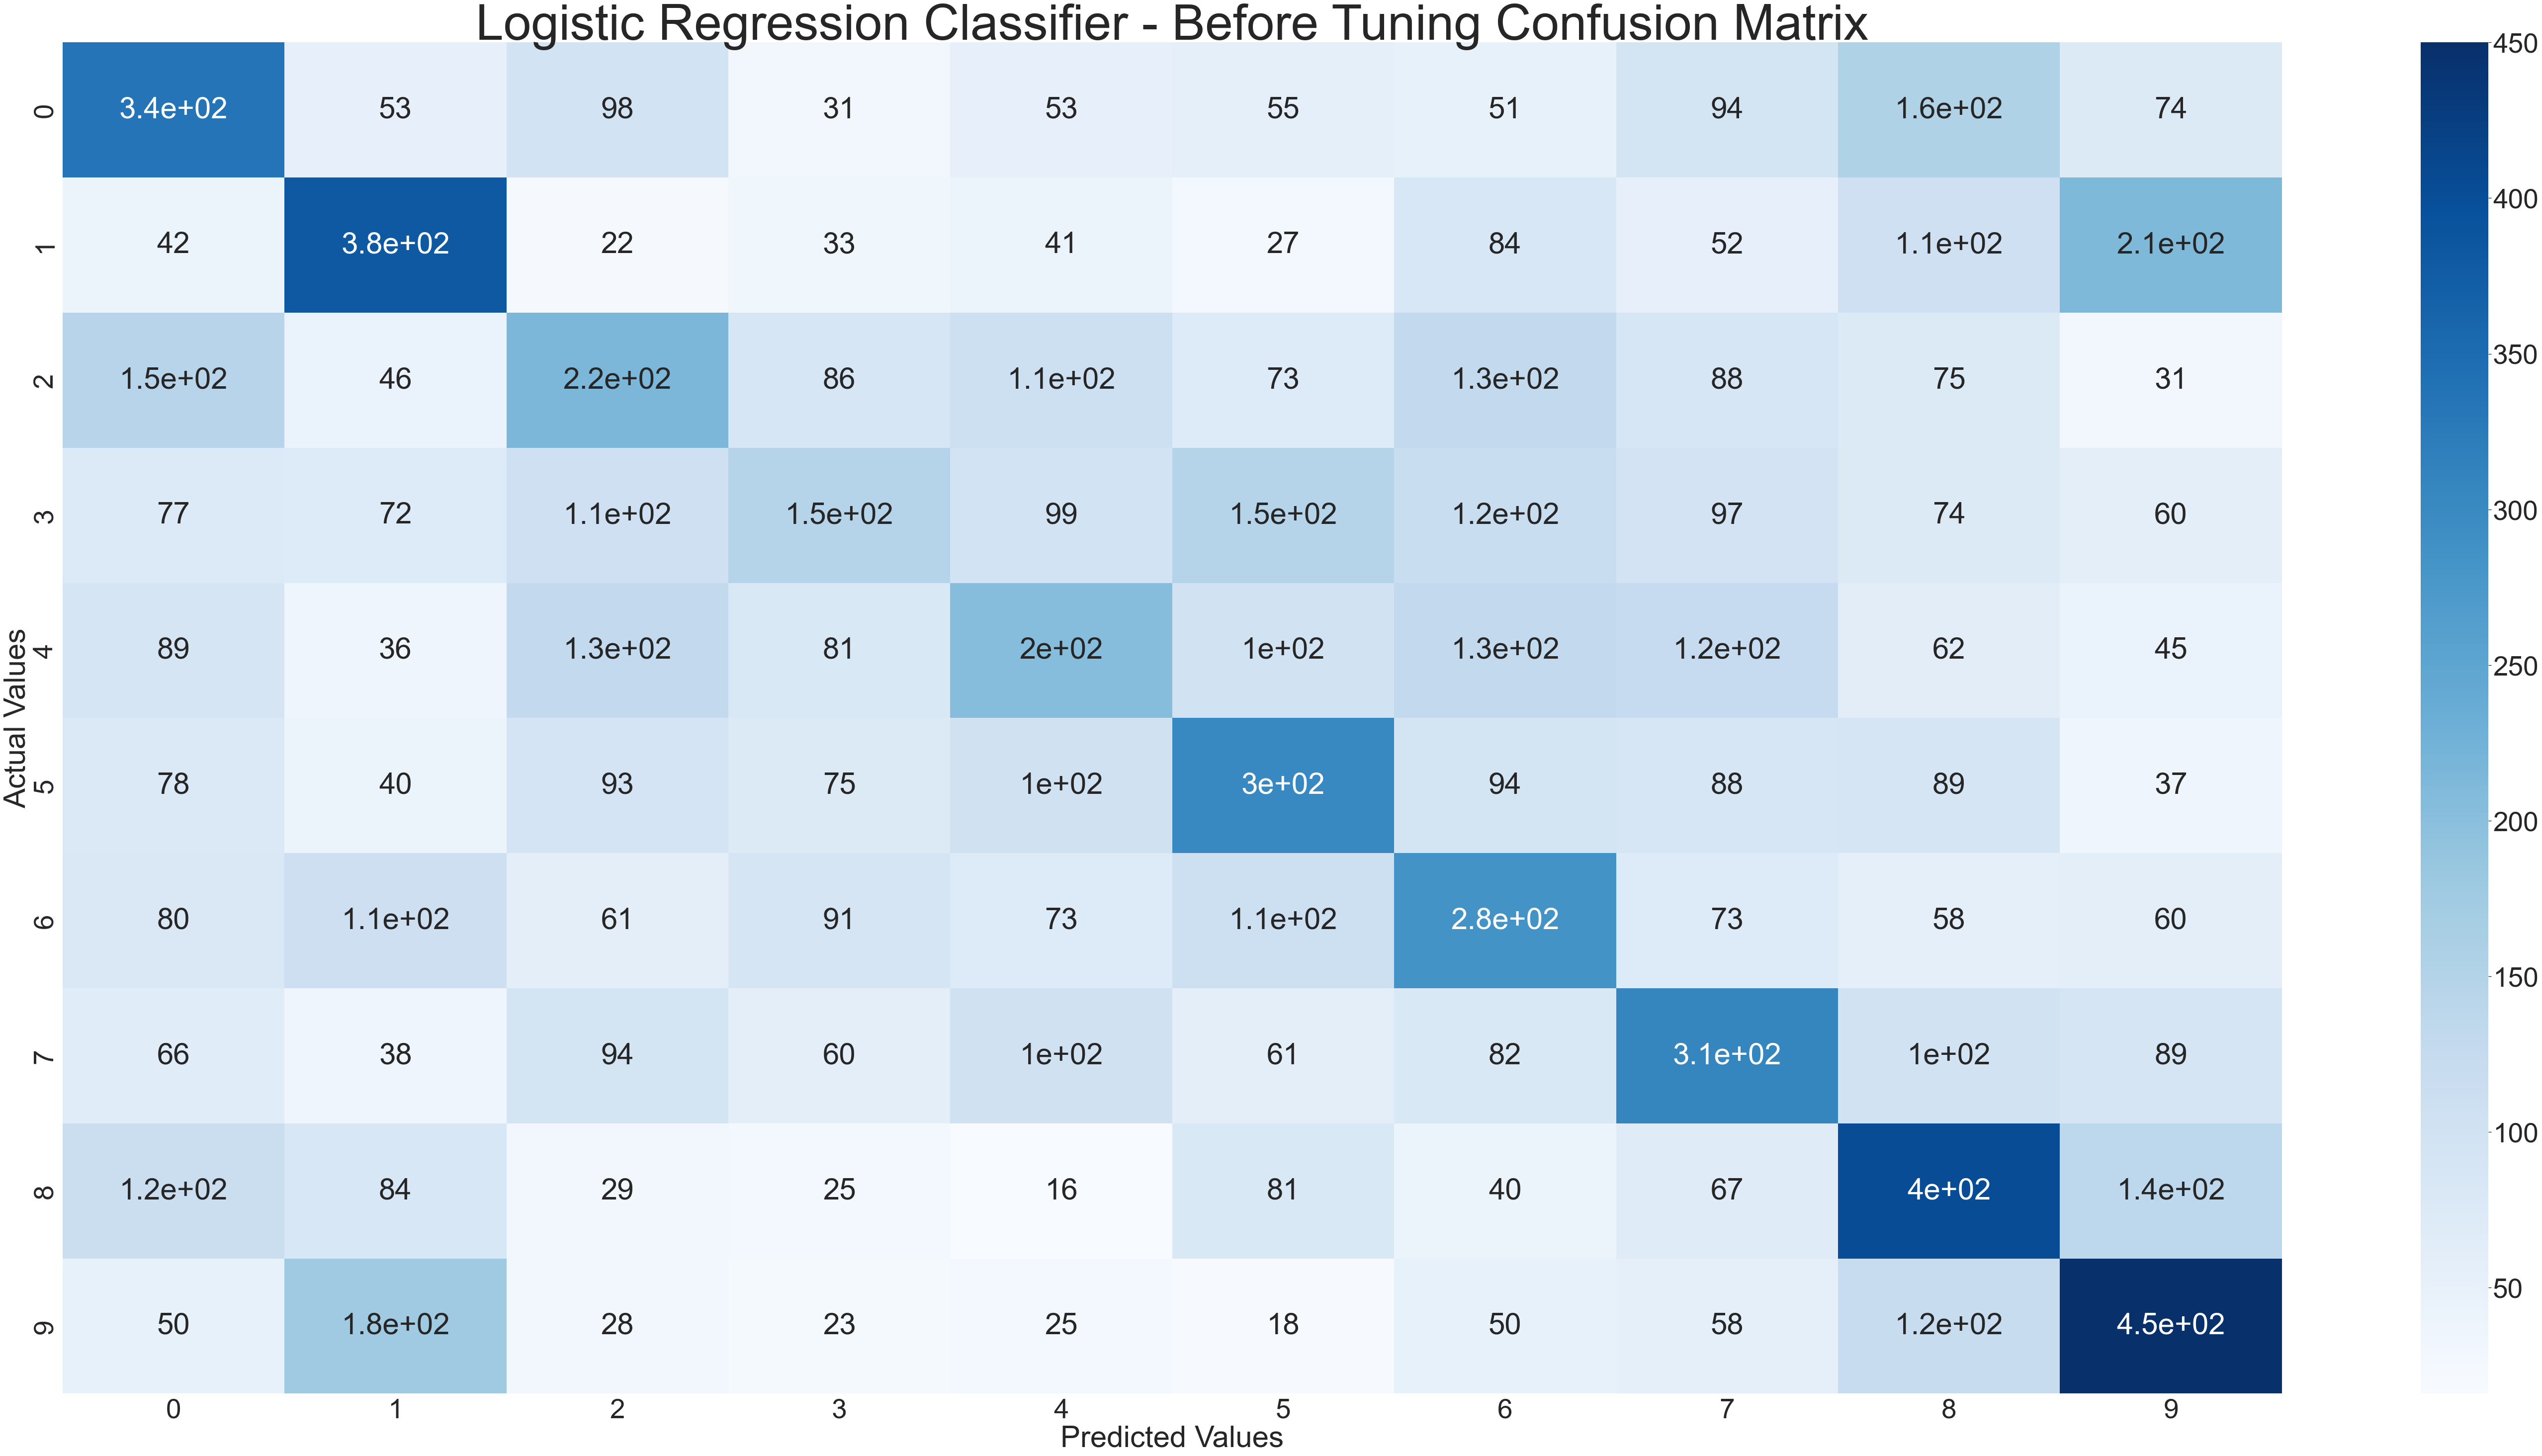

In [20]:
eval_model(lrc,"Logistic Regression Classifier - Before Tuning")

In [22]:
cross_validation(lrc,"Logistic Regression Classifier - Before Tuning")

Logistic Regression Classifier - Before Tuning Mean Cross Validation F1-Score:0.297
Logistic Regression Classifier - Before Tuning Mean Cross Validation Accuracy:30.248%


The cross validated f1-score of the model is 0.297. This is extremely low. Based on the classification report, the classes with:
<ul>
    <li> Poor Precision - 2,3,4,6 as the precisions are below 0.3 </li>
    <li> Poor Recall - 2,3,4,6,7 as the recalls are below 0.3  </li>
    <li> Poor F1-score - 3,4,6 as the f1-scores are below 0.3 </li>
    </ul>
    
However, the model is still performing poorly across all classes as the none of the metrics are above 0.8 
 
 Based on the confusion matrix:
<ul>
 <li> Class 0 is generally misclassified to Class 2,4,8 </li>
<li>Class 1 is generally misclassified to Class 8,9 </li>
<li>Class 2 is generally misclassified to Class 0,4,6 </li>
<li>Class 3 is generally misclassified to Class 5,6 </li>
<li>Class 4 is generally misclassified to Class 2,6,7 </li>
<li>Class 5 is generally misclassified to Class 2,6 however the misclassification is compratively lower</li>
<li>Class 6 is generally misclassified to Class 1,5 </li>
<li>Class 7 is generally misclassified to Class 4,8</li>
<li>Class 8 is generally misclassified to Class 0,9 </li>
<li>Class 9 is generally misclassified to Class 1,8 </li>
    </ul>

This explains the results of the confusion matrix and classification report

### 6.2 Logistic Regression Classifier - Grid Search with Cross Validation
In order to fine tune the logistic regression classifier, I will perofrm grid search to identify the ideal paramters to optimize the models' performance. The grid search will run all the different combinations of parameters with cross validation The cross validaion will ensure that the model is not overfitting when identifying the ideal set of paramters. Hence, it will ensure that the model is able to generalize well on unseen data.

In [79]:
#define paramters for grid search

#Algorithm to use in the optimization problem.
lrc_gridsearch_solver = ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]

#Inverse of regularization strength
lrc_gridsearch_c_values = [100, 10, 1.0, 0.1, 0.01]

#norm of the penalty
lrc_gridsearch_penalty = ["l1","l2","elasticnet","none"]

#Maximum number of iterations taken for the solvers to converge.
lrc_gridsearch_max_iter = [100, 200, 300]

In [80]:
#set parameter grid
lrc_gridsearch_param_grid = {
    'solver': lrc_gridsearch_solver,
    "C":lrc_gridsearch_c_values,
    "penalty":lrc_gridsearch_penalty,
    "max_iter":lrc_gridsearch_max_iter
        }

In [82]:
lrc_gridsearch_cv = GridSearchCV(estimator = lrc, param_grid = lrc_gridsearch_param_grid, cv = 3, n_jobs = -1, verbose = 2,scoring="f1_macro")
#scoring used as f1_score as it is the most important metric in this classification problem
lrc_gridsearch_cv.fit(X_train, y_train)

Fitting 3 folds for each of 300 candidates, totalling 900 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='f1_macro', verbose=2)

In [83]:
print("Logistic Regression Classifier Best Parameters from Grid Search with Cross Validation are: \n")
print(lrc_gridsearch_cv.best_params_)

Logistic Regression Classifier Best Parameters from Grid Search with Cross Validation are: 

{'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


In [25]:
#run model with best paramteres obtained from grid search
lrc_gridsearch = LogisticRegression(solver="lbfgs",penalty="l2",C=0.01,max_iter=100)
lrc_gridsearch.fit(X_train,y_train)

LogisticRegression(C=0.01)

#### 6.2.1 Random Forest Classifier - Grid Search: Evaluvate Model


 
 ---------------------Classification Report---------------------
              precision    recall  f1-score   support

           0       0.33      0.31      0.31      1065
           1       0.40      0.37      0.38      1087
           2       0.22      0.26      0.24       851
           3       0.16      0.23      0.19       704
           4       0.20      0.25      0.22       801
           5       0.32      0.30      0.31      1090
           6       0.28      0.28      0.28      1008
           7       0.31      0.31      0.31      1016
           8       0.39      0.33      0.36      1180
           9       0.46      0.38      0.42      1198

    accuracy                           0.31     10000
   macro avg       0.31      0.30      0.30     10000
weighted avg       0.32      0.31      0.31     10000

---------------------------------------------------------------


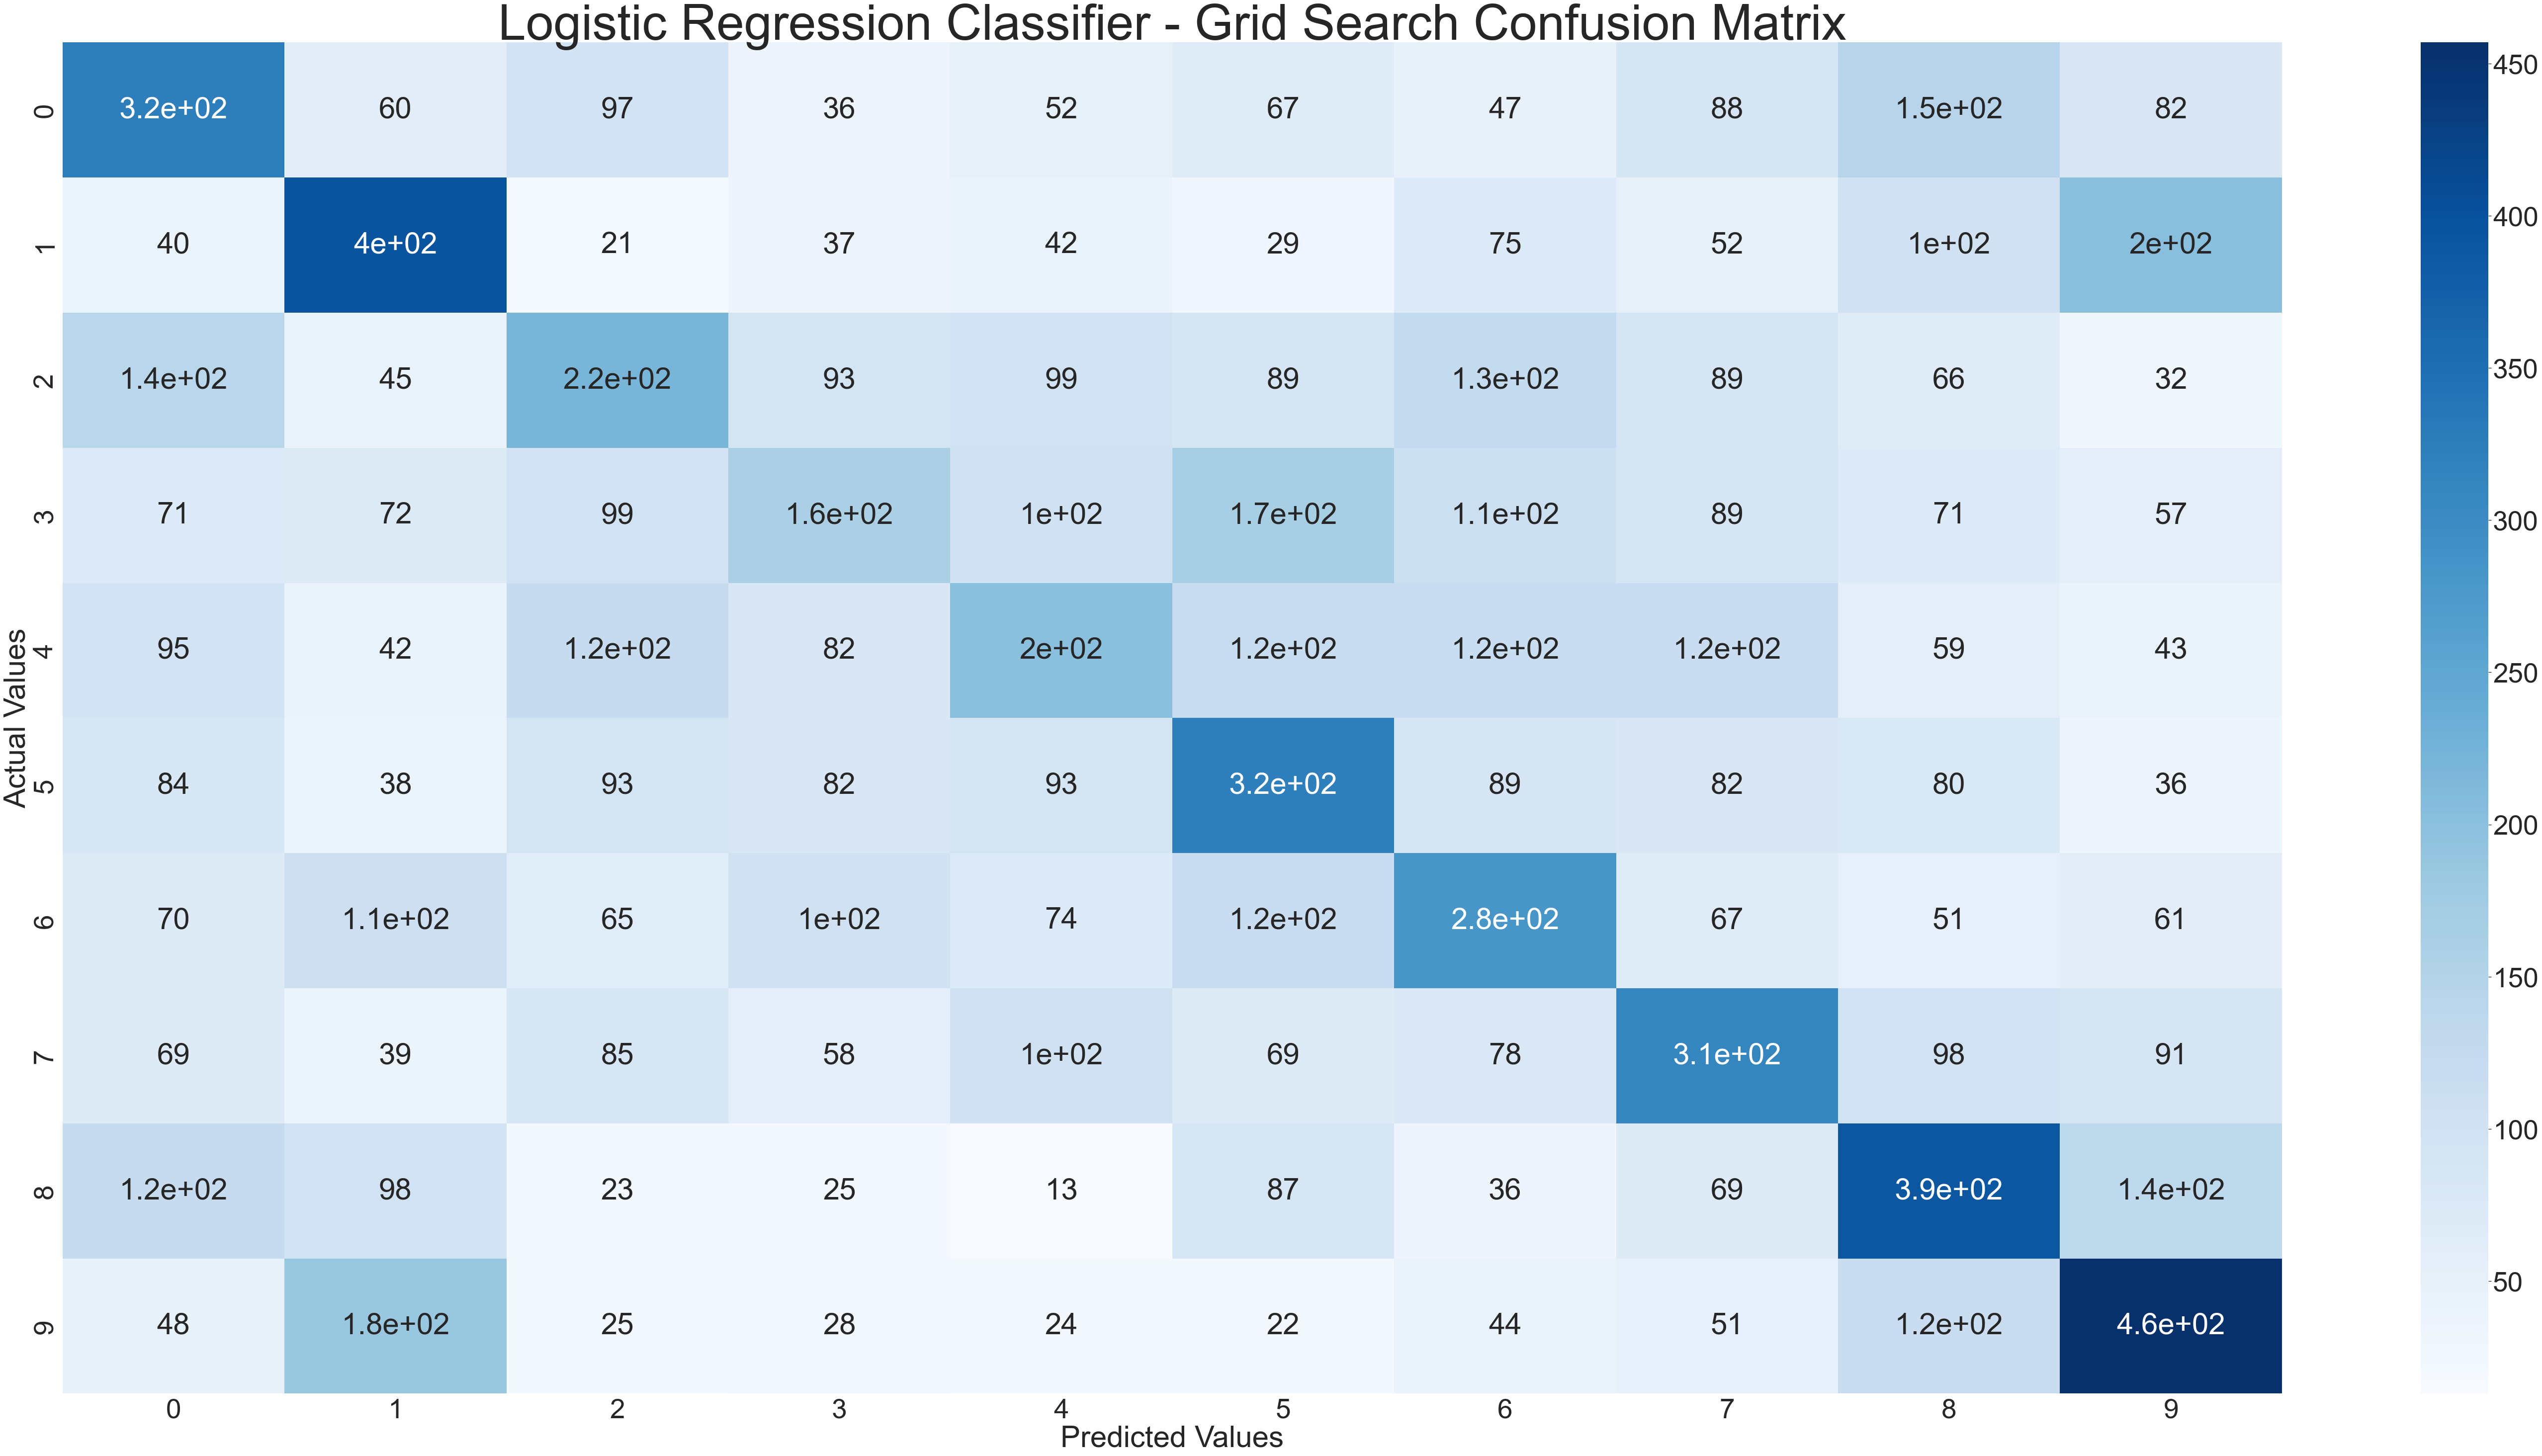

In [26]:
eval_model(lrc_gridsearch,"Logistic Regression Classifier - Grid Search")

In [27]:
cross_validation(lrc_gridsearch,"Logistic Regression Classifier - Grid Search")

Logistic Regression Classifier - Grid Search Mean Cross Validation F1-Score:0.3
Logistic Regression Classifier - Grid Search Mean Cross Validation Accuracy:30.552%


## 6. Logistic Regression Classifier

Logistic Regression Classifier - Before Tuning Mean Cross Validation F1-Score:0.297
Logistic Regression Classifier - Before Tuning Mean Cross Validation Accuracy:30.248%

The grid search was not very beneficial as the cross validated f1-score increased only by 0.003 from 0.297 to 0.3. The accuracy increased by by 0.304% from 30.248% to 30.552%. 

However the model is still poor performing.Based on the classification report, the classes with improvement are:
<ul>
    <li> Precision - 0,1,3,5,8,9 </li>
    <li> Recall -  2,6,7</li>
    <li> F1-score -1,2,3,7 </li>
    </ul>
  
 Many classes has seen improvement especially in precision. However, the imporvement is very minor. The model is still performing poorly across all classes as the none of the metrics are above 0.8 
 
 Based on the confusion matrix:
<ul>
 <li> Class 0 is generally misclassified to Class 8 </li>
<li>Class 1 is generally misclassified to Class 9 </li>
<li>Class 2 is generally misclassified to Class 6 </li>
<li>Class 3 is generally misclassified to Class 5 </li>
<li>Class 4 is generally misclassified to Class 2,5,6,7 </li>
<li>Class 5 is generally misclassified to Class 6 ,however the misclassification is compratively lower</li>
<li>Class 6 is generally misclassified to Class 1,3 </li>
<li>Class 7 is generally misclassified to Class 4,8,9 however the misclassification is compratively lower</li>
<li>Class 8 is generally misclassified to Class 0,9 </li>
<li>Class 9 is generally misclassified to Class 1,8 </li>
    </ul>

This explains the results of the confusion matrix and classification report

## 7. Conclusion

Both Random Forest Classifier and Logistic Regression Classifier generally misclassifies the classes into the same wrong classes. Hence I will be exploring the reasons for that using the average pixel intensity histograms plotted in Part 1

Class 3 is performs poorly in both models and it generally misclassifies the imgages as class 5. This could be due to the average pixel instensity peaking between 113-117 

Class 0 is generally misclassified as class 8. This could be due to the average pixel instensity peaking between 157-159 in both classes

Class 1 is generally misclassified as class 9. This could be due to the average pixel instensity peaking between 118-121 in both classes

Class 2 is generally misclassified as class 6. This could be due to the average pixel instensity ranging between 108 - 124 in both classes

Class 4 is generally misclassified as class 2. This could be due to the average pixel instensity ranging between the same range 106 - 129 in both classes

Class 4 is generally misclassified as class 6. This could be due to the average pixel instensity ranging between the same range 106 - 129 in both classes

Class 8 is generally misclassified as class 0. This could be due to the average pixel instensity preaking between the same range 151 - 159 and 148 - 151 in both classes

Class 8 is generally misclassified as class 9. This could be due to the average pixel instensity ranging between the same range 98 - 164 in both classes. 

Class 9 is generally misclassified as class 1. This could be due to the average pixel instensity ranging between the same range 83 - 143 and preaking between 119-121 in both classes. 

In conclusion, the machine learning models are not ideal models to be used for image classification. However, Random Forest Classifier performs much better than Logistic Regression Classifier across all classes.